In [2]:
import os, yaml, sys
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

ENV = os.getenv("MY_ENV", "dev")
with open("../../config.yaml", "r") as f:
    config = yaml.safe_load(f)
paths = config[ENV]["paths"]
sys.path.append(paths["src_path"])
from general_utils.utils import autocorr_mat, get_lagplot

In [3]:
data_path = f"{paths['livingstone_lab']}/tiziano/data"
monkey_name = "red"
day = "0826"
npx = False
imec_n = 0
resolution_Hz = 60
if npx:
    neural_path = f"{data_path}/neural_{monkey_name}_25{day}_imec{imec_n}_{resolution_Hz}Hz.pkl"
    gaze_path = f"{data_path}/gaze_{monkey_name}_25{day}_imec{imec_n}_{resolution_Hz}Hz.pkl"
else:
    neural_path = f"{data_path}/neural_{monkey_name}_25{day}_plx_{resolution_Hz}Hz.pkl"
    gaze_path = f"{data_path}/gaze_{monkey_name}_25{day}_plx_{resolution_Hz}Hz.pkl"
# end if npx:

In [4]:
with open(neural_path, "rb") as f:
    data = pickle.load(f)
with open(gaze_path, "rb") as f:
    data_gaze = pickle.load(f)

In [33]:
data_gaze["steve1.mp4"].shape

(383, 722, 1)

In [6]:
stimuli_names = list(data.keys())

In [7]:
print(len(stimuli_names), stimuli_names)

19 ['IMG_4662.mp4', 'IMG_4658.mp4', 'IMG_4668.mp4', 'IMG_4656.mp4', 'IMG_4664.mp4', 'IMG_4669.mp4', 'IMG_4663.mp4', 'IMG_4672.mp4', 'IMG_4657.mp4', 'IMG_4665.mp4', 'IMG_4661.mp4', 'IMG_4660.mp4', 'IMG_4666.mp4', 'IMG_4671.mp4', 'IMG_4667.mp4', 'IMG_4673.mp4', 'IMG_4670.mp4', 'IMG_4659.mp4', 'IMG_4655.mp4']


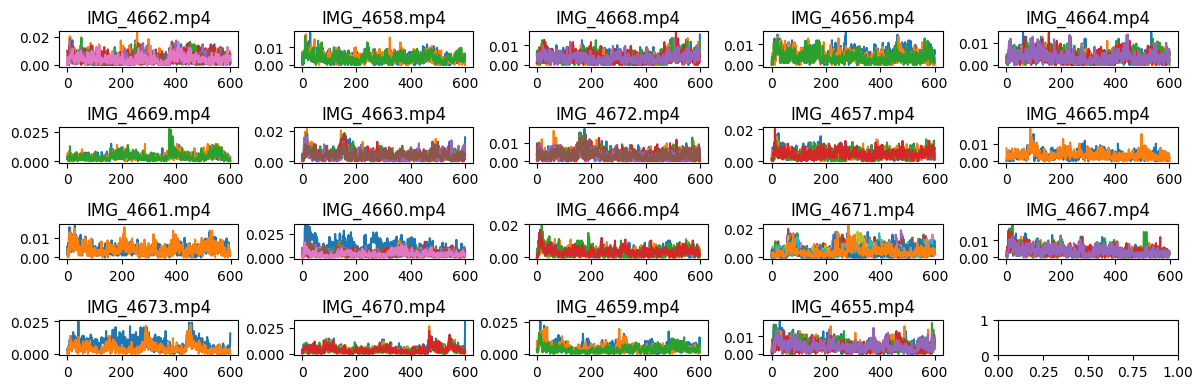

In [27]:
counter = 0
fig, axes = plt.subplots(4, 5, figsize=(12, 4))
axes_flat = axes.ravel()
for i, s in enumerate(stimuli_names):
    n_repetitions = data[s].shape[2]
    avg_units = np.mean(data[s], axis=0)
    axes_flat[i].plot(avg_units)
    axes_flat[i].set_title(s)
plt.tight_layout()  # automatically adjusts spacing
plt.show()


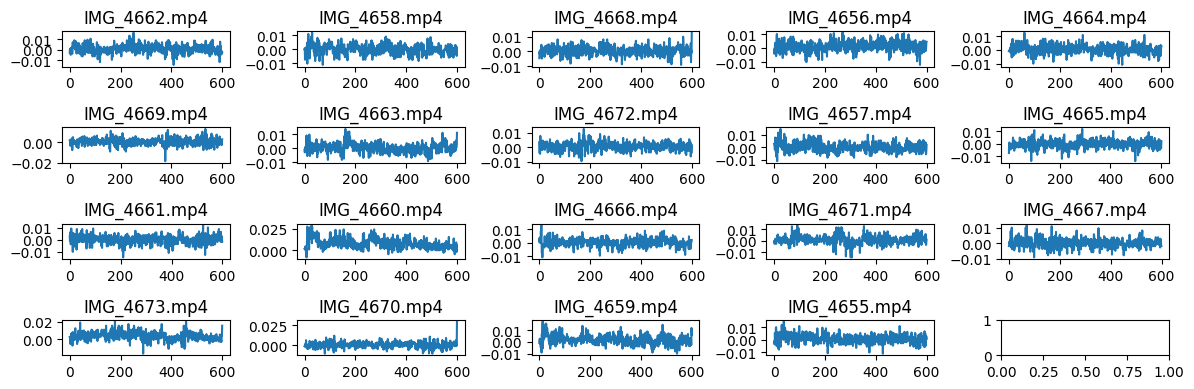

In [28]:
counter = 0
fig, axes = plt.subplots(4, 5, figsize=(12, 4))
axes_flat = axes.ravel()
for i,s in enumerate(stimuli_names):
    n_repetitions = data[s].shape[2]
    avg_units = np.mean(data[s], axis=0)
    first_vs_last = avg_units[:,0] - avg_units[:,-1]
    axes_flat[i].plot(first_vs_last)
    axes_flat[i].set_title(s)
    counter += 1
plt.tight_layout()  # automatically adjusts spacing
plt.show()

In [10]:
for s in stimuli_names:
    n_repetitions = data[s].shape[2]
    avg_units = np.mean(data[s], axis=0)
    corrfirst_vs_last = np.corrcoef(avg_units[:-1,0], avg_units[:-1,-1])
    print(corrfirst_vs_last[0,1], f"with {n_repetitions} reps")

0.13649202079932288 with 7 reps
0.1294706575962911 with 3 reps
0.18420200673100115 with 5 reps
0.131322735188136 with 3 reps
0.11090616211407775 with 5 reps
0.42822169721951525 with 3 reps
0.20469443643175145 with 6 reps
0.24441260362648348 with 6 reps
0.07955219120504935 with 4 reps
0.11803478756311468 with 2 reps
0.1923912438159804 with 2 reps
0.19853393213232876 with 7 reps
0.20049120750091073 with 4 reps
0.2118398672255934 with 12 reps
0.31244777276877955 with 5 reps
0.333728475305694 with 2 reps
0.3522011175869235 with 4 reps
0.17584097363010093 with 3 reps
0.18122398651863175 with 5 reps


In [11]:
for s in stimuli_names:
    n_repetitions = data[s].shape[2]
    avg_units = np.mean(data[s], axis=0)
    corrfirst_vs_last = np.corrcoef(avg_units[:-1,0], avg_units[:-1,-1])
    print(corrfirst_vs_last[0,1], f"with {n_repetitions} reps")
    

0.13649202079932288 with 7 reps
0.1294706575962911 with 3 reps
0.18420200673100115 with 5 reps
0.131322735188136 with 3 reps
0.11090616211407775 with 5 reps
0.42822169721951525 with 3 reps
0.20469443643175145 with 6 reps
0.24441260362648348 with 6 reps
0.07955219120504935 with 4 reps
0.11803478756311468 with 2 reps
0.1923912438159804 with 2 reps
0.19853393213232876 with 7 reps
0.20049120750091073 with 4 reps
0.2118398672255934 with 12 reps
0.31244777276877955 with 5 reps
0.333728475305694 with 2 reps
0.3522011175869235 with 4 reps
0.17584097363010093 with 3 reps
0.18122398651863175 with 5 reps


In [12]:
rev_files = [f for f in stimuli_names if "_rev" in f]

for rev_name in rev_files[1:]:
    orig_name = rev_name.replace("_rev", "")
    if orig_name != "steve1.mp4":
        orig_name = orig_name.replace("1", "")
        if orig_name != "stevetoB5.mp4":
            orig_name = orig_name.replace("B", "b")
        # end if orig_name != "stevetoB5.mp4":
        if orig_name == "stevetoAlle.mp4":
            orig_name = orig_name.replace("A", "a")
    # end if orig_name != "steve1.mp4":
    avg_units = np.mean(data[orig_name], axis=0)[:-1,-1]
    avg_units_rev = np.mean(data[rev_name], axis=0)[:-1,-1][::-1]
    min_size = min(avg_units.shape[0], avg_units_rev.shape[0])
    corrfirst_vs_last = np.corrcoef(avg_units[:min_size], avg_units_rev[:min_size])
    print(corrfirst_vs_last[0,1])

In [13]:
files = ['steve1toB5_rev.mp4', 'stevetoalle.mp4', 'steve1_rev.mp4', 
         'steve1toBluehat_rev.mp4', 'stevetoB5.mp4', 'steve1.mp4', 
         'stevetobluehat.mp4', 'steve1toBlondie_rev.mp4', 'stevetoblondie.mp4']

# Separate reversed and original
rev_files = [f for f in files if "_rev" in f]
orig_files = [f for f in files if "_rev" not in f]
print(rev_files)
print(orig_files)

['steve1toB5_rev.mp4', 'steve1_rev.mp4', 'steve1toBluehat_rev.mp4', 'steve1toBlondie_rev.mp4']
['stevetoalle.mp4', 'stevetoB5.mp4', 'steve1.mp4', 'stevetobluehat.mp4', 'stevetoblondie.mp4']


In [15]:
for s in stimuli_names:
    print(s, data[s].shape[2])

stevetoB5.mp4 1
steve1.mp4 1
steve1_rev.mp4 5
stevetobluehat.mp4 2
steve1toAlle_rev.mp4 3
stevetoalle.mp4 1
steve1toBlondie_rev.mp4 3
steve1toBluehat_rev.mp4 10
steve1toB5_rev.mp4 3
stevetoblondie.mp4 2


In [14]:
s = "steve1toBluehat_rev.mp4"
mat = autocorr_mat(data[s][:,:,0], data2=data[s][:,:,-1])
lp = get_lagplot(mat, max_lag=200, min_datapts=100)

KeyError: 'steve1toBluehat_rev.mp4'

In [15]:
plt.plot(lp, marker="x")

NameError: name 'lp' is not defined

In [51]:
# create 200-length integer array with zero at the middle (index 100)
center_zero_array = np.arange(-100, 101, dtype=int)
assert center_zero_array.size == 201 and center_zero_array[100] == 0


19:12:00 - There are nans in corr_mat


19:12:00 - There are nans in corr_mat
19:12:00 - There are nans in corr_mat
19:12:00 - There are nans in corr_mat
19:12:00 - There are nans in corr_mat
19:12:00 - There are nans in corr_mat
19:12:00 - There are nans in corr_mat
19:12:00 - There are nans in corr_mat
19:12:00 - There are nans in corr_mat
19:12:00 - There are nans in corr_mat
19:12:00 - There are nans in corr_mat
19:12:00 - There are nans in corr_mat
19:12:00 - There are nans in corr_mat
19:12:00 - There are nans in corr_mat
19:12:00 - There are nans in corr_mat
19:12:00 - There are nans in corr_mat
19:12:00 - There are nans in corr_mat
19:12:00 - There are nans in corr_mat


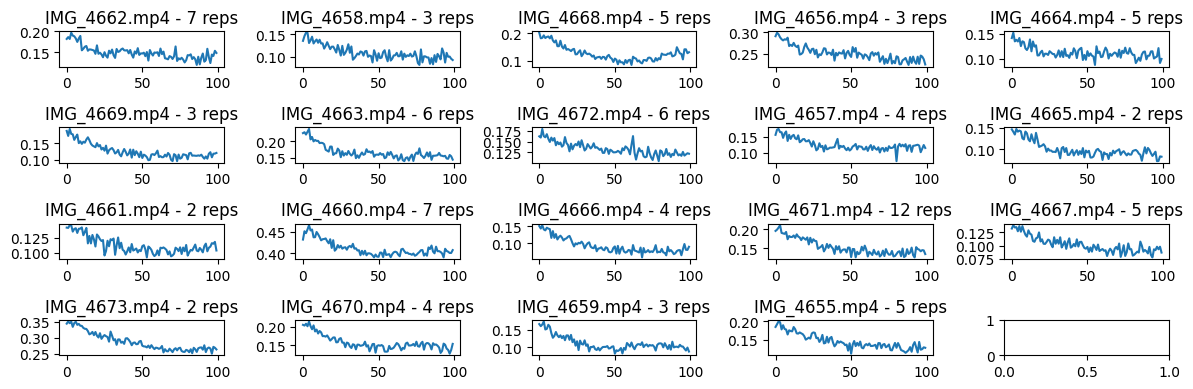

In [52]:
counter = 0
fig, axes = plt.subplots(4, 5, figsize=(12, 4))
axes_flat = axes.ravel()
for i,s in enumerate(stimuli_names):
    n_repetitions = data[s].shape[2]
    first_vs_last_mat = autocorr_mat(data[s][:,:,0], data2=data[s][:,:,0])
    lp_1st_vs_last = get_lagplot(first_vs_last_mat, max_lag=100, min_datapts=100, symmetric=True)
    #axes_flat[i].plot(idx_max, lp_1st_vs_last[idx_max], 'ro', markersize=4)
    axes_flat[i].plot(lp_1st_vs_last[1:])
    axes_flat[i].set_title(f"{s} - {n_repetitions} reps")
    counter += 1
plt.tight_layout()  # automatically adjusts spacing
plt.show()

19:12:49 - There are nans in corr_mat
IMG_4662.mp4 103 0.1640836321737815
19:12:49 - There are nans in corr_mat
IMG_4658.mp4 94 0.14099823788582477
19:12:49 - There are nans in corr_mat
IMG_4668.mp4 105 0.13921550173841754
19:12:49 - There are nans in corr_mat
IMG_4656.mp4 101 0.1543565275534505
19:12:49 - There are nans in corr_mat
IMG_4664.mp4 107 0.1256706580837179
19:12:49 - There are nans in corr_mat
IMG_4669.mp4 98 0.17279611815126983
19:12:49 - There are nans in corr_mat
IMG_4663.mp4 112 0.15217153317098153
19:12:49 - There are nans in corr_mat
IMG_4672.mp4 99 0.13477329150760992
19:12:49 - There are nans in corr_mat
IMG_4657.mp4 98 0.14347636373038766
19:12:49 - There are nans in corr_mat
IMG_4665.mp4 98 0.145981707990412
19:12:49 - There are nans in corr_mat
IMG_4661.mp4 100 0.13423660627880515
19:12:49 - There are nans in corr_mat
IMG_4660.mp4 199 0.1932582401476087
19:12:49 - There are nans in corr_mat
IMG_4666.mp4 99 0.13242814215668752
19:12:49 - There are nans in corr_mat

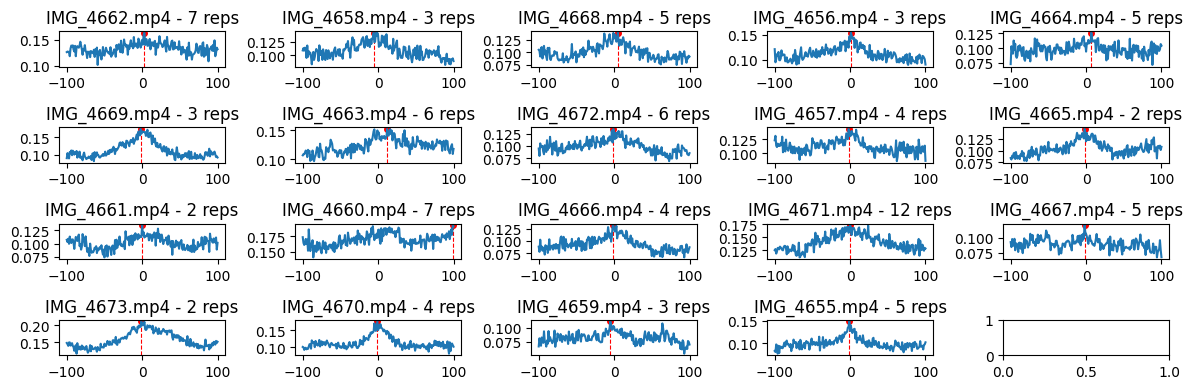

In [55]:
counter = 0
fig, axes = plt.subplots(4, 5, figsize=(12, 4))
axes_flat = axes.ravel()
for i,s in enumerate(stimuli_names):
    n_repetitions = data[s].shape[2]
    first_vs_last_mat = autocorr_mat(data[s][:,:,0], data2=data[s][:,:,-1])
    lp_1st_vs_last = get_lagplot(first_vs_last_mat, max_lag=100, min_datapts=100)
    idx_max = int(np.nanargmax(lp_1st_vs_last))
    print(s, idx_max, lp_1st_vs_last[idx_max])
    axes_flat[i].axvline(center_zero_array[idx_max], color='r', linestyle='--', linewidth=0.8)
    axes_flat[i].plot(center_zero_array[idx_max], lp_1st_vs_last[idx_max], 'ro', markersize=4)
    axes_flat[i].plot(center_zero_array,lp_1st_vs_last)
    axes_flat[i].set_title(f"{s} - {n_repetitions} reps")
    counter += 1
plt.tight_layout()  # automatically adjusts spacing
plt.show()

IndexError: index 12 is out of bounds for axis 0 with size 12

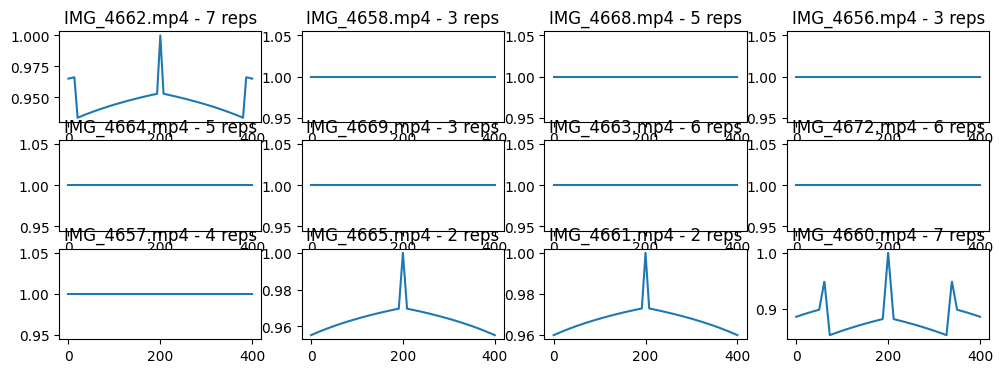

In [19]:
counter = 0
fig, axes = plt.subplots(3, 4, figsize=(12, 4))
axes_flat = axes.ravel()
#fig1, axes1 = plt.subplots(3, 4, figsize=(12, 4))
#axes_flat1 = axes1.ravel()
for i,s in enumerate(stimuli_names):
    n_repetitions = data_gaze[s].shape[2]
    first_vs_last_mat = autocorr_mat(data_gaze[s][:,:,0])
    lp_1st_vs_last = get_lagplot(first_vs_last_mat, max_lag=200, min_datapts=100)
    # axes_flat1[i].imshow(first_vs_last_mat)
    # axes_flat1[i].set_title(f"{s} - {n_repetitions} reps")
    axes_flat[i].plot(lp_1st_vs_last)
    axes_flat[i].set_title(f"{s} - {n_repetitions} reps")
    counter += 1
plt.tight_layout() 
 # automatically adjusts spacing
plt.show()

18:39:23 - There are nans in corr_mat
18:39:23 - There are nans in corr_mat
18:39:23 - There are nans in corr_mat
18:39:23 - There are nans in corr_mat
18:39:23 - There are nans in corr_mat
18:39:23 - There are nans in corr_mat
18:39:23 - There are nans in corr_mat
18:39:23 - There are nans in corr_mat
18:39:23 - There are nans in corr_mat
18:39:23 - There are nans in corr_mat
18:39:23 - There are nans in corr_mat
18:39:23 - There are nans in corr_mat
18:39:23 - There are nans in corr_mat
18:39:23 - There are nans in corr_mat
18:39:23 - There are nans in corr_mat
18:39:23 - There are nans in corr_mat
18:39:23 - There are nans in corr_mat
18:39:23 - There are nans in corr_mat


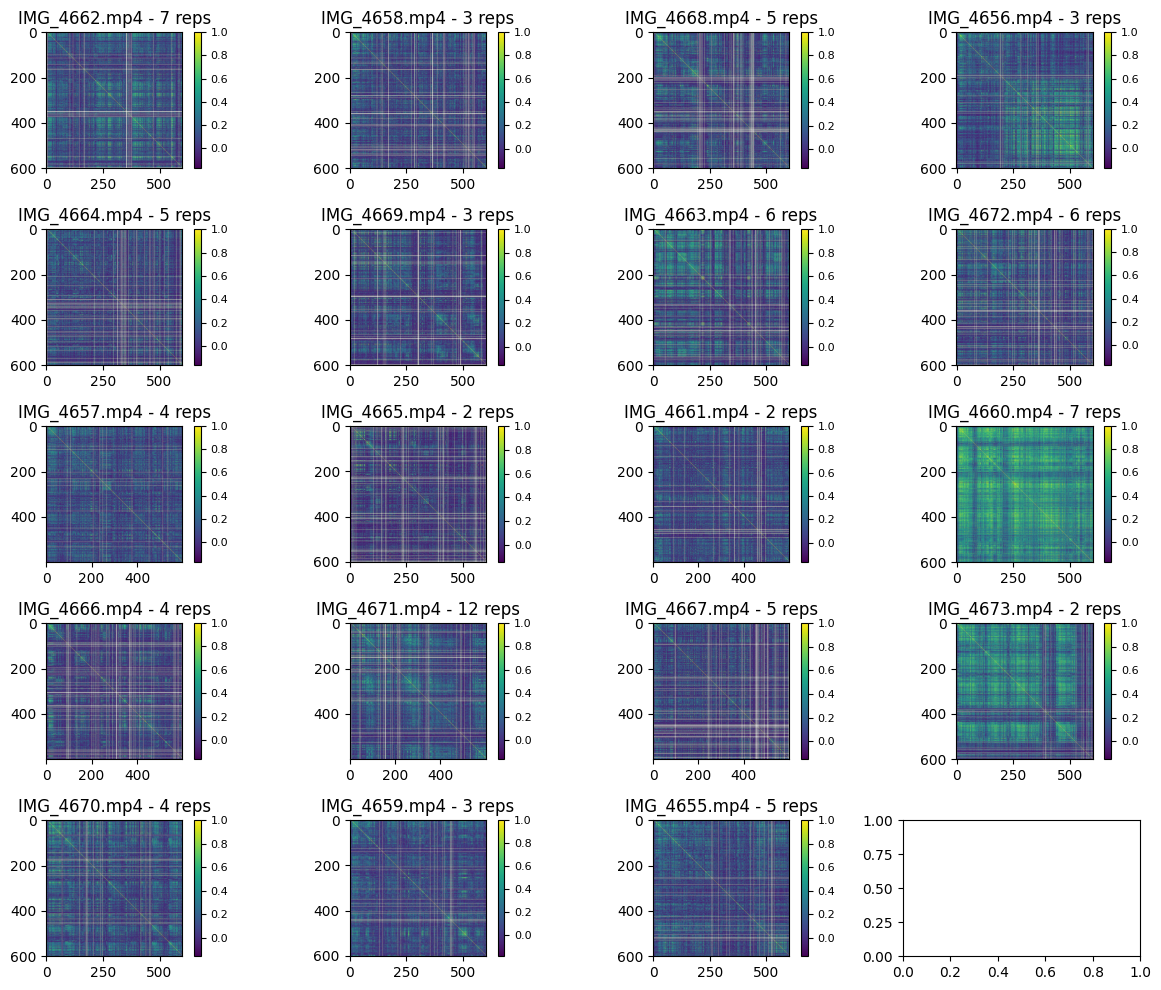

In [20]:
counter = 0
# fig, axes = plt.subplots(3, 4, figsize=(12, 4))
# axes_flat = axes.ravel()
fig1, axes1 = plt.subplots(5, 4, figsize=(12, 10))
axes_flat1 = axes1.ravel()
for i,s in enumerate(stimuli_names):
    n_repetitions = data_gaze[s].shape[2]
    first_vs_last_mat = autocorr_mat(data[s][:,:,0])
    lp_1st_vs_last = get_lagplot(first_vs_last_mat, max_lag=200, min_datapts=100)
    axes_flat1[i].imshow(first_vs_last_mat)
    axes_flat1[i].set_title(f"{s} - {n_repetitions} reps")
    cbar = fig1.colorbar(axes_flat1[i].images[0], ax=axes_flat1[i])
    cbar.ax.tick_params(labelsize=8)
    
    counter += 1
plt.tight_layout() 
 # automatically adjusts spacing
plt.show()

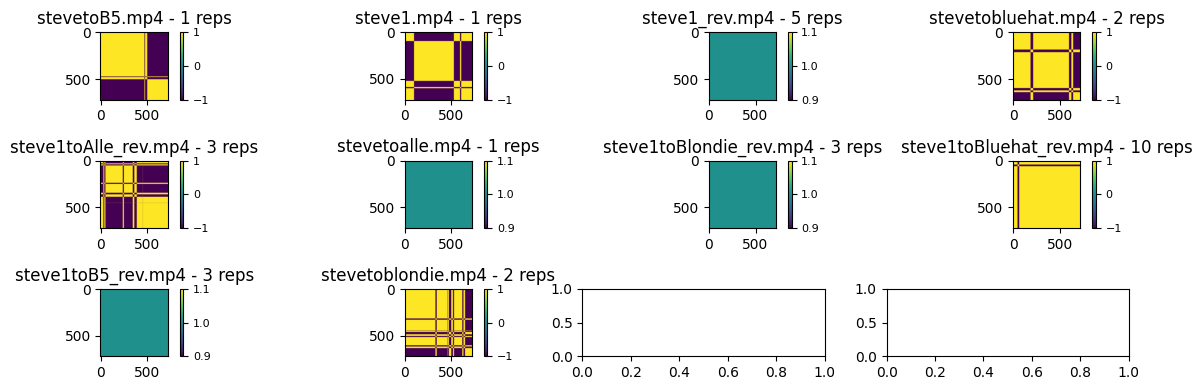

In [70]:
counter = 0
# fig, axes = plt.subplots(3, 4, figsize=(12, 4))
# axes_flat = axes.ravel()
fig1, axes1 = plt.subplots(3, 4, figsize=(12, 4))
axes_flat1 = axes1.ravel()
for i,s in enumerate(stimuli_names):
    n_repetitions = data_gaze[s].shape[2]
    first_vs_last_mat = autocorr_mat(data_gaze[s][:,:,0])
    lp_1st_vs_last = get_lagplot(first_vs_last_mat, max_lag=200, min_datapts=100)
    axes_flat1[i].imshow(first_vs_last_mat)
    axes_flat1[i].set_title(f"{s} - {n_repetitions} reps")
    cbar = fig1.colorbar(axes_flat1[i].images[0], ax=axes_flat1[i])
    cbar.ax.tick_params(labelsize=8)
    
    counter += 1
plt.tight_layout() 
 # automatically adjusts spacing
plt.show()

In [84]:
from scipy.spatial.distance import pdist, squareform

# compute pairwise Euclidean distances between columns
dist_mat = squareform(pdist(data_gaze[s][:,:,0].T, metric='euclidean'))
#np.corrcoef(data_gaze[s][:,:,0], rowvar=False) #, data_gaze[s][0,:,0])

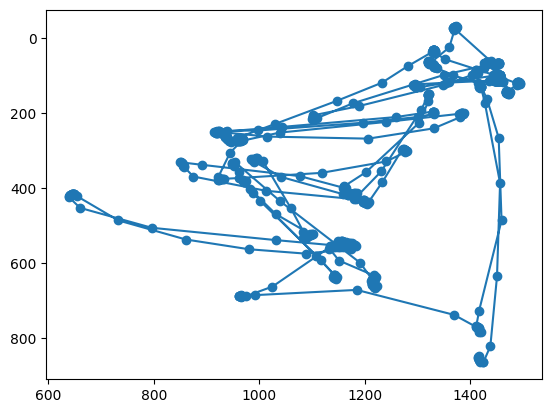

In [95]:
s = "steve1toB5_rev.mp4"
plt.plot(data_gaze[s][0,:,0], data_gaze[s][1,:,0], marker="o")
plt.gca().invert_yaxis()

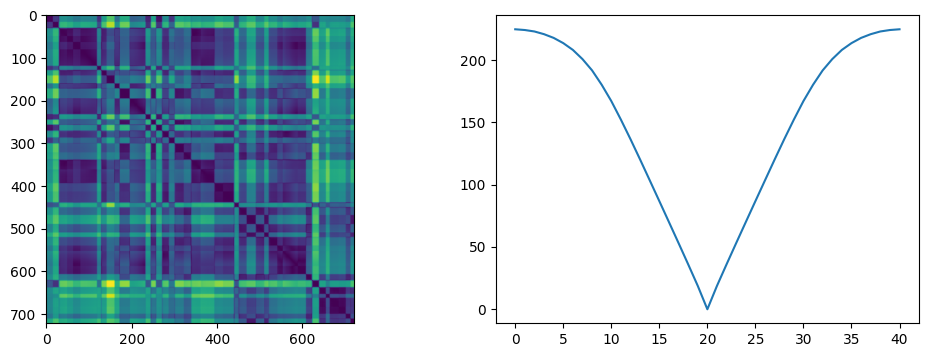

In [94]:
fig1, axes1 = plt.subplots(1, 2, figsize=(12, 4))
axes1[0].imshow(dist_mat)
axes1[1].plot(get_lagplot(dist_mat))

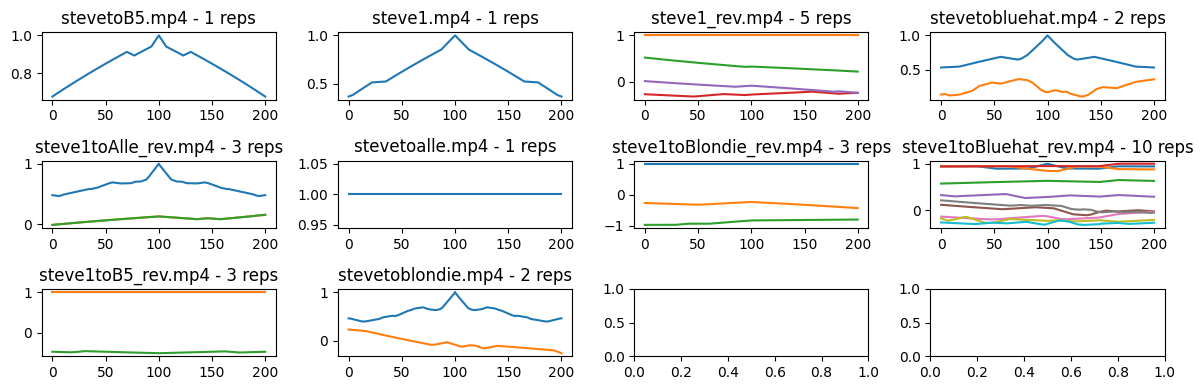

In [41]:
counter = 0
fig, axes = plt.subplots(3, 4, figsize=(12, 4))
axes_flat = axes.ravel()
for i,s in enumerate(stimuli_names):
    n_repetitions = data_gaze[s].shape[2]
    for i_rep in range(n_repetitions):
        first_vs_last_mat = autocorr_mat(data_gaze[s][:,:,0], data2=data_gaze[s][:,:,i_rep])
        lp_1st_vs_last = get_lagplot(first_vs_last_mat, max_lag=100, min_datapts=100)
        axes_flat[i].plot(lp_1st_vs_last)
        axes_flat[i].set_title(f"{s} - {n_repetitions} reps")
    counter += 1
plt.tight_layout()  # automatically adjusts spacing
plt.show()

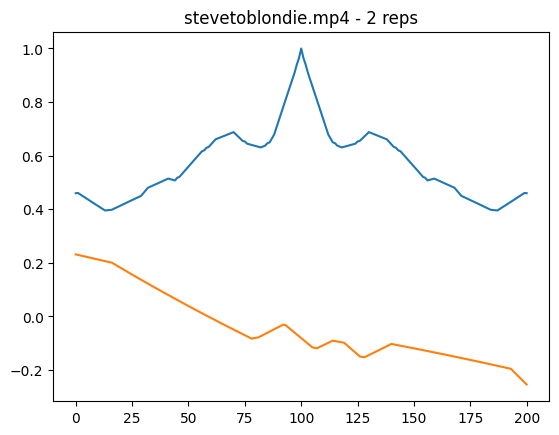

In [39]:
n_repetitions = data_gaze[s].shape[2]
for i_rep in range(n_repetitions):
    first_vs_last_mat = autocorr_mat(data_gaze[s][:,:,0], data2=data_gaze[s][:,:,i_rep])
    lp_1st_vs_last = get_lagplot(first_vs_last_mat, max_lag=100, min_datapts=100)
    plt.plot(lp_1st_vs_last)
    plt.title(f"{s} - {n_repetitions} reps")

In [21]:
"""
participation_ratio
Computes the participation ratio of each neuron in data_mat (rows). 
participation_ratio = avg_rate^2 / avg_squared_rate
INPUT:
- data_mat: numpy.ndarray -> data matrix with responses of neurons (neu x stim)

OUTPUT:
- a: numpy.ndarray -> each neuron's participation ratio (neu x 1)
"""
def participation_ratio(data_mat: np.ndarray) -> np.ndarray:
    n_neu, n_stim = data_mat.shape
    numerator = (np.sum(data_mat, axis=1)/n_stim)**2
    eps = 10e-8 # to avoid dividing by zero
    denominator = np.sum(data_mat**2 + eps, axis=1)/n_stim
    a = numerator/denominator
    return a
# EOF

def rust_sparseness(data_mat):
    n_neu, n_stim = data_mat.shape
    a = participation_ratio(data_mat)
    S = (1 - a) / (1 - 1/n_stim)
    return S
# EOF

In [32]:
tot_sp = []
for s in stimuli_names:
    d = data[s][:,:,0]
    sparsity = rust_sparseness(d.T)
    tot_sp.append(sparsity) 

In [44]:
min_size = min([tot_sp[i].size for i in range(len(tot_sp))])
for i in range(len(tot_sp)):
    a = tot_sp[i][:min_size]
    if 'a_tot' not in locals():
        a_tot = a
    else:
        a_tot += a


/var/folders/nw/yf48zdjj1m5012281wx_pzhc0000gn/T/ipykernel_55398/3875180245.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


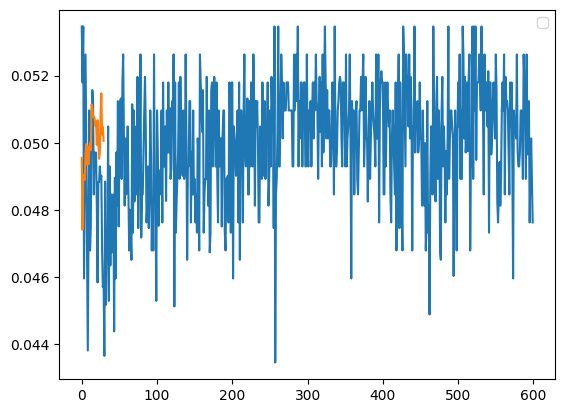

In [ ]:
plt.plot(a/len(tot_sp))
y = a / len(tot_sp)
# mov = np.convolve(y, np.ones(window)/window, mode='same')
# plt.plot(mov, color='C1', linewidth=2, label=f'moving mean (w={window})')
# plt.plot(y, color='C0', alpha=0.4, label='original')

plt.legend()
plt.show()

In [63]:
from data_preprocessing.preprocessing import get_firing_rate, create_bins
bins = create_bins(600, 20)
trial_firing_rate = get_firing_rate(bins, y[np.newaxis, :])


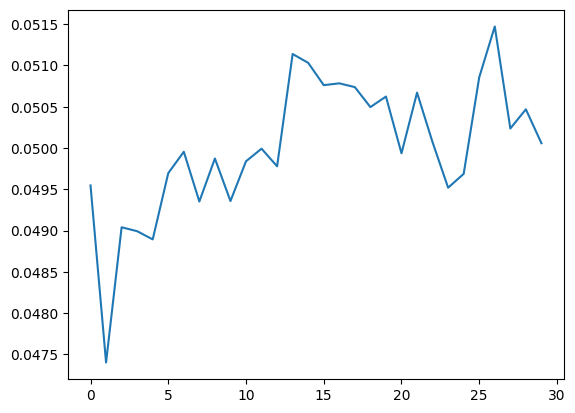